# SVM Manual Hyperparameter Tuning Summary on Iris Dataset

*  Manually tuned hyperparameters for SSVM looping over:

      * Kernels: 'linear', 'poly', 'rbf'

      * C values: 10 values between 1 and 5

      * Gamma values: 15 values between 0.1 and 5

* Used train_test_split (70/30) and scaled features using StandardScaler

* Best performing configuration:

    * Kernel: 'rbf'

    * C: 1.0

    * Gamma: 0.1 to 2.0

    * Accuracy: ~98.3% on test set

* Multiple RBF configurations consistently achieved high accuracy (~ 0.983), indicating robust performance across a wide hyperparameter range

* Visualized predictions using 3D scatter plots and confusion matrix to inspect classification patterns and errors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('IRIS.xls')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [45]:
from sklearn.svm import SVC
model = SVC()

# Manually Finding the Best Hyperparameters

In [103]:
kernels = ['rbf','poly','linear']
cVals = np.linspace(1,5,10)
gammaValsSmol = np.linspace(0.1,1,10)
gammaValBig = np.linspace(1,5,5)
gammaVals = np.concatenate((gammaValsSmol,gammaValBig))

In [104]:
import random

In [105]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['species'], test_size=0.4,random_state=random.randint(1,100))
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [109]:
for kernel in kernels:
    for cVal in cVals:
        for gammaVal in gammaVals:
              model = SVC(kernel = kernel, C = cVal, gamma = gammaVal)
              model.fit(X_train, y_train)
              score = model.score(X_test, y_test)
              if score > 0.98:
                print(f"Kernel = {kernel} C : {cVal} Gamma : {gammaVal} Score : {score}")

Kernel = rbf C : 1.0 Gamma : 0.1 Score : 0.9833333333333333
Kernel = rbf C : 1.0 Gamma : 0.2 Score : 0.9833333333333333
Kernel = rbf C : 1.0 Gamma : 0.30000000000000004 Score : 0.9833333333333333
Kernel = rbf C : 1.0 Gamma : 0.4 Score : 0.9833333333333333
Kernel = rbf C : 1.0 Gamma : 0.5 Score : 0.9833333333333333
Kernel = rbf C : 1.0 Gamma : 2.0 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 0.1 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 0.2 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 0.30000000000000004 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 0.8 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 0.9 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 1.0 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 1.0 Score : 0.9833333333333333
Kernel = rbf C : 1.4444444444444444 Gamma : 2.0 Score : 0.9833333333333333
Kernel =

In [93]:
df.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

### Converitng back to dataframe for convienience.

In [94]:
X_train = pd.DataFrame(X_train_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X_test = pd.DataFrame(X_test_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Model Training

In [95]:
model = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [111]:
y_pred = model.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#dfNew = pd.DataFrame({'sepal_length' : X_test['sepal_length'], 'petal_length' : X_test['petal_length'],'petal_width' : X_test['petal_width'],'sepal_width' : X_test['sepal_width'],'Predicted': y_pred, 'Actual': y_test})
#dfNew

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.9833333333333333

# Plotting

Confusion Matrix

<Axes: >

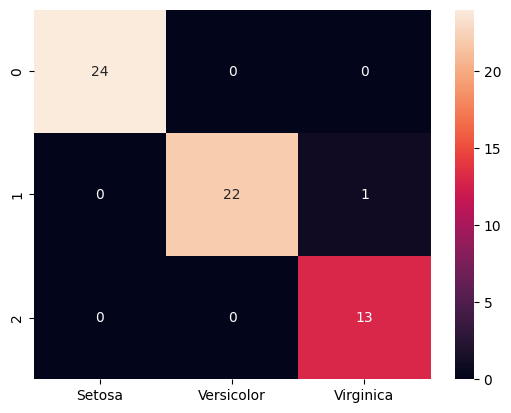

In [113]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot = True, xticklabels=['Setosa','Versicolor', 'Virginica'])

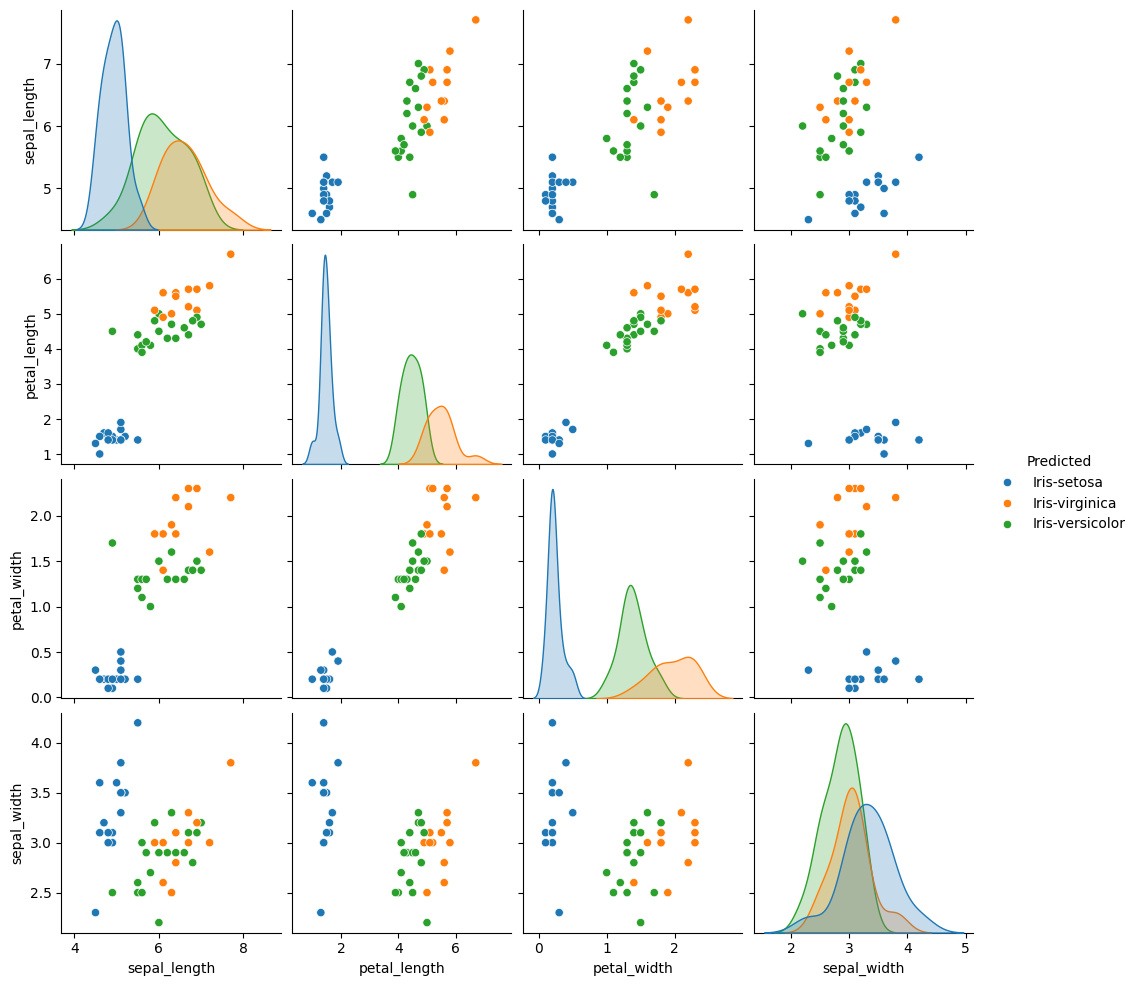

In [114]:
ax = sns.pairplot(dfNew, hue='Predicted')

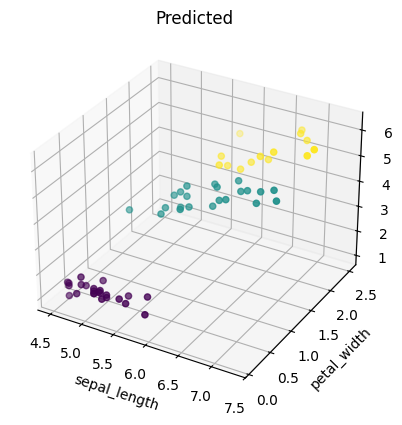

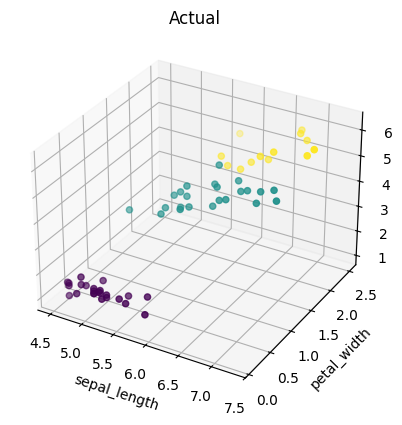

In [115]:
ax = plt.axes(projection = '3d')

color_vals = df2['Predicted'].astype('category').cat.codes

ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('petal_length')
ax.scatter3D(X_test['sepal_length'],X_test['petal_width'],X_test['petal_length'],c = color_vals)
ax.set_title('Predicted')
plt.show()


ax2 = plt.axes(projection = '3d')

color_vals2 = df2['Actual'].astype('category').cat.codes

ax2.set_xlabel('sepal_length')
ax2.set_ylabel('petal_width')
ax2.set_zlabel('petal_length')
ax2.scatter3D(X_test['sepal_length'],X_test['petal_width'],X_test['petal_length'],c = color_vals2)
ax2.set_title('Actual')
plt.show()

In [117]:
df2.loc[df2['Actual'] != df2['Predicted']]

,Actual,Predicted
83,Iris-versicolor,Iris-virginica
